In [0]:
#!pip install matplotlib
#!pip install pandas_datareader
#!pip install sklearn

#!pip install tensorflow-gpu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Text(0, 0.5, 'scaled price($)')

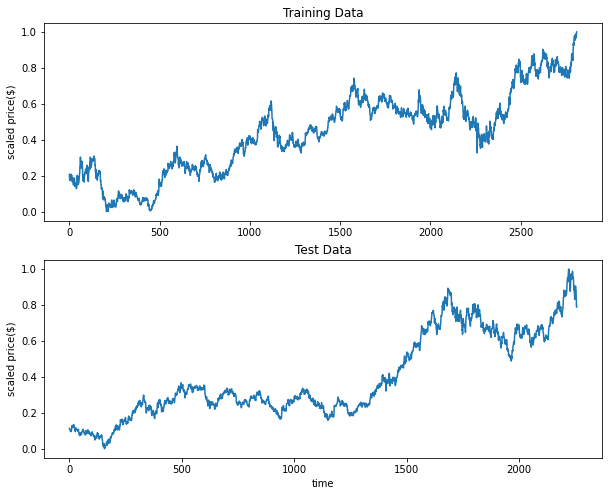

In [0]:
### START CODE HERE ###
df_train = pdr.DataReader('005930.KS', 'yahoo', datetime(2000,1,1), datetime(2010,12,31))
df_test = pdr.DataReader('005930.KS', 'yahoo', datetime(2011,1,1), datetime(2020,5,22))
### END CODE HERE ###

training_set = df_train.iloc[:, 3:4].values
test_set = df_test.iloc[:, 3:4].values
#training_set.shape, test_set.shape
#assert training_set.shape == (2767,1)
#assert test_set.shape == (2363,1)
### END CODE HERE ###
sc1 = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc1.fit_transform(training_set)
sc2 = MinMaxScaler(feature_range=(0,1))
test_set_scaled = sc2.fit_transform(test_set)

plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set_scaled)
plt.title("Training Data")
plt.ylabel('scaled price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set_scaled)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('scaled price($)')


In [0]:
X_train = []
Y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
Y_test = []
for i in range(60, test_set_scaled.shape[0]):
    X_test.append(test_set_scaled[i-60:i, 0])
    Y_test.append(test_set_scaled[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# **Case 1**

In [0]:

#import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow.keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 500
batch_size = 64

reduceLR = ReduceLROnPlateau( 
    monitor='val_loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=10,         # epoch 10 동안 개선되지 않으면 callback이 호출
)

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=20,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(epochs, batch_size)
checkpoint = ModelCheckpoint(filename,             # file명을 지정
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # best 값만 저장
                             mode='auto'           # auto는 알아서 best를 찾는다. min/max
                            )


### START CODE HERE ###
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM((50),input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.LSTM(100,return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    
                                    
                                    tf.keras.layers.LSTM(50),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),
    

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 60, 50)            200       
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 100)           60400     
_________________________________________________________________
batch_normalization_4 (Batch (None, 60, 100)           400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)               

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Epoch 1/500
43/43 - 2s - loss: 1.0744 - val_loss: 0.0715 - lr: 0.0010
Epoch 2/500
43/43 - 1s - loss: 0.5030 - val_loss: 0.0742 - lr: 0.0010
Epoch 3/500
43/43 - 1s - loss: 0.3898 - val_loss: 0.0479 - lr: 0.0010
Epoch 4/500
43/43 - 1s - loss: 0.2989 - val_loss: 0.0531 - lr: 0.0010
Epoch 5/500
43/43 - 1s - loss: 0.2498 - val_loss: 0.0364 - lr: 0.0010
Epoch 6/500
43/43 - 1s - loss: 0.2004 - val_loss: 0.0429 - lr: 0.0010
Epoch 7/500
43/43 - 1s - loss: 0.1485 - val_loss: 0.0161 - lr: 0.0010
Epoch 8/500
43/43 - 1s - loss: 0.1154 - val_loss: 0.0359 - lr: 0.0010
Epoch 9/500
43/43 - 1s - loss: 0.0877 - val_loss: 0.0218 - lr: 0.0010
Epoch 10/500
43/43 - 1s - loss: 0.0627 - val_loss: 0.0296 - lr: 0.0010
Epoch 11/500
43/43 - 1s - loss: 0.0437 - val_loss: 0.0095 - lr: 0.0010
Epoch 12/500
43/43 - 1s - loss: 0.0311 - val_loss: 0.0070 - lr: 0.0010
Epoch 13/500
43/43 - 1s - loss: 0.0216 - val_loss: 0.0233 - lr: 0.0010
Epoch 14/500
43/43 - 1s - loss: 0.0179 - val_loss: 0.0149 - lr: 0.0010
Epoch 15/500
43

In [0]:
predicted_X_train = model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 71.54796343071516
평균 test error: 238.13217893397407


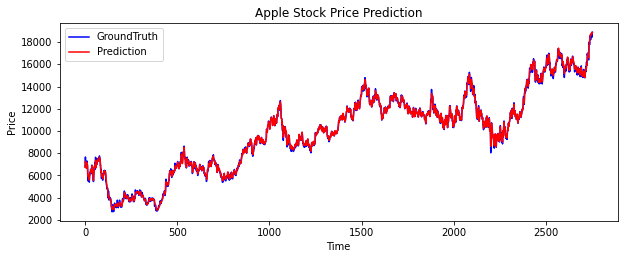

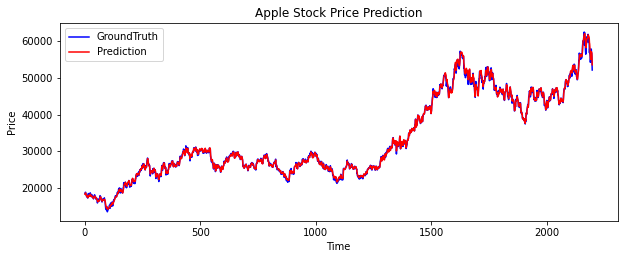

In [0]:
plt.subplot(2, 1, 1)
plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Case 2**

In [0]:

#import tensorflow as tf


### START CODE HERE ###
model_GRU = tf.keras.models.Sequential([
                                    tf.keras.layers.GRU((50),input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.GRU(100,return_sequences=True),
                                    tf.keras.layers.Dropout(0.2),
                                    
                                    
                                    tf.keras.layers.GRU(50),
                                    tf.keras.layers.Dropout(0.2),
    

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model_GRU.summary()

model_GRU.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model_GRU.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 100)           45600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
predicted_X_train = model_GRU.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model_GRU.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 89.61517387212709
평균 test error: 234.77552391378526


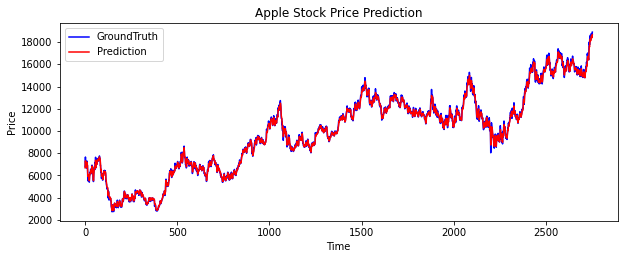

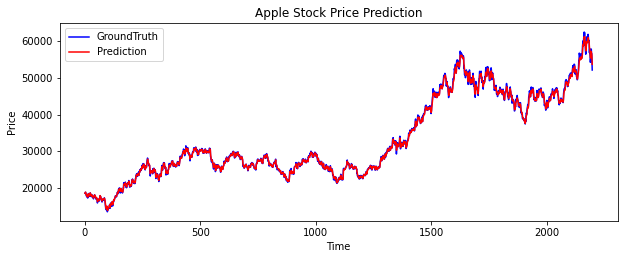

In [0]:
plt.subplot(2, 1, 1)
plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Case 3**

In [0]:

#import tensorflow as tf


### START CODE HERE ###
model_GRU_1 = tf.keras.models.Sequential([
                                    tf.keras.layers.GRU(100,input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.GRU(200),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model_GRU_1.summary()

model_GRU_1.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model_GRU_1.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 60, 100)           30900     
_________________________________________________________________
batch_normalization_6 (Batch (None, 60, 100)           400       
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 200)               181200    
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [0]:
predicted_X_train = model_GRU_1.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model_GRU_1.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 42.300402973973476
평균 test error: 135.25572519762284


# **Case 4**

In [0]:

#import tensorflow as tf


### START CODE HERE ###
model_GRU_2 = tf.keras.models.Sequential([
                                    tf.keras.layers.GRU(50,input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.GRU(100),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model_GRU_2.summary()

model_GRU_2.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model_GRU_2.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 60, 50)            7950      
_________________________________________________________________
batch_normalization_8 (Batch (None, 60, 50)            200       
_________________________________________________________________
dropout_15 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
gru_10 (GRU)                 (None, 100)               45600     
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [0]:
predicted_X_train = model_GRU_2.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model_GRU_2.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 410.0699403452319
평균 test error: 1025.1365037107598


# **Case 5**

In [0]:

#import tensorflow as tf


### START CODE HERE ###
model_GRU_3 = tf.keras.models.Sequential([
                                    tf.keras.layers.GRU(200,input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.GRU(300),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model_GRU_3.summary()

model_GRU_3.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model_GRU_3.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 60, 200)           121800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 60, 200)           800       
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 200)           0         
_________________________________________________________________
gru_12 (GRU)                 (None, 300)               451800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [0]:
predicted_X_train = model_GRU_2.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model_GRU_2.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 410.0699403452319
평균 test error: 1025.1365037107598


# **Case 6**

In [0]:

#import tensorflow as tf


### START CODE HERE ###
model_GRU_3 = tf.keras.models.Sequential([
                                    tf.keras.layers.GRU(100,input_shape = (60, 1),return_sequences=True),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    
                                    tf.keras.layers.GRU(200),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Dense(1,activation = 'linear')
                                    #마지막 dense에 acitvation은 softmax

])


### END CODE HERE ###

model_GRU_3.summary()

model_GRU_3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_GRU_3.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          epochs = epochs, 
          verbose = 2,
          batch_size = batch_size,
          callbacks=[reduceLR,earlystopping])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 60, 100)           30900     
_________________________________________________________________
batch_normalization_12 (Batc (None, 60, 100)           400       
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
gru_14 (GRU)                 (None, 200)               181200    
_________________________________________________________________
batch_normalization_13 (Batc (None, 200)               800       
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [0]:
predicted_X_train = model_GRU_3.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model_GRU_3.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 143.9733122005019
평균 test error: 396.2762454504095


결론 : Case 3가 가장 135fh test error가 낮았다.
